In [1]:
from clipp2.core_cuda import *
from clipp2.preprocess import *

In [2]:
df1 = process_files('AVPC/ACC55/55-post.snv.txt', 'AVPC/ACC55/55-post.cna.txt','AVPC/ACC55/55-post.purity.txt')
df2 = process_files('AVPC/ACC55/55-pre.snv.txt', 'AVPC/ACC55/55-pre.cna.txt','AVPC/ACC55/55-pre.purity.txt')

Loaded SNV data from AVPC/ACC55/55-post.snv.txt with shape (9952, 4)
Loaded CNA data from AVPC/ACC55/55-post.cna.txt with shape (355, 5)
Purity: 0.87
Constructed df with shape (9952, 11)
Loaded SNV data from AVPC/ACC55/55-pre.snv.txt with shape (8956, 4)
Loaded CNA data from AVPC/ACC55/55-pre.cna.txt with shape (312, 5)
Purity: 0.67
Constructed df with shape (8956, 11)


In [3]:
[df1, df2] = insert_distinct_rows_multi([df1, df2])

In [4]:
export_snv_cna_and_purity(
        df1,
        dir="AVPC/ACC55pre/",
        snv_path="55post.snv.txt",
        cna_path="55post.cna.txt",
        purity_path="55post.purity.txt"
    )


In [5]:
export_snv_cna_and_purity(
        df2,
        dir="AVPC/ACC55pre/",
        snv_path="55pre.snv.txt",
        cna_path="55pre.cna.txt",
        purity_path="55pre.purity.txt"
    )

In [6]:
snv_file      = "AVPC/ACC55pre/55post.snv.txt"
cn_file       = "AVPC/ACC55pre/55post.cna.txt"
purity_file   = "AVPC/ACC55pre/55post.purity.txt"
sample_id     = "--sample_id"   # not heavily used in logic
output_prefix = "E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55post"

# Call function with drop_data=True (to replicate R code's dropping logic)
process_data(
    snv_file, cn_file, purity_file, sample_id, output_prefix, 
    drop_data=False
)

Process done. Created outputs in E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55post.


In [7]:
snv_file      = "AVPC/ACC55pre/55pre.snv.txt"
cn_file       = "AVPC/ACC55pre/55pre.cna.txt"
purity_file   = "AVPC/ACC55pre/55pre.purity.txt"
sample_id     = "--sample_id"   # not heavily used in logic
output_prefix = "E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55pre"

# Call function with drop_data=True (to replicate R code's dropping logic)
process_data(
    snv_file, cn_file, purity_file, sample_id, output_prefix, 
    drop_data=False
)

Process done. Created outputs in E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data/acc55pre.


In [8]:
import pickle
with open('label.pkl', 'rb') as f:
    lab = pickle.load(f)

In [9]:
import pickle
with open('rows.pkl', 'rb') as f:
    rows = pickle.load(f)

In [10]:
root_dir = "E:/Dropbox/GitHub/Multi_Region_CliPP/processed_data"
(r, n, minor, total, purity, coef_list, wcut, drop) = group_all_regions_for_ADMM(root_dir)

r = r[rows, :]
n = n[rows, :]
minor = minor[rows, :]
total = total[rows, :]
coef_list = [x[rows, :] for x in coef_list]

Loaded region 'acc55post': r.shape=(11328,), coef.shape=(11328, 6), purity=0.87
Loaded region 'acc55pre': r.shape=(11328,), coef.shape=(11328, 6), purity=0.67

=== Summary of grouped data before dropping rows ===
Found M=2 regions. r shape= (11328, 2), n= (11328, 2)
minor= (11328, 2), total= (11328, 2)
coef_list length= 2 (each is (No_mutation,6))
wcut= [-0.18  1.8 ]

Dropped 0 rows that were all-zero in r/n/minor/total/coef.

=== Summary of grouped data after dropping rows ===
r shape= (11328, 2), n= (11328, 2)
minor= (11328, 2), total= (11328, 2)
coef_list length= 2, each => shape (11328, 6)


In [11]:
ccf = r / n
ccf_corrected = ccf / minor

In [12]:
import pickle

with open('ccf.pkl', 'wb') as f:
    pickle.dump(ccf_corrected, f)

In [1]:
import pickle

with open('ccf.pkl', 'rb') as f:
    ccf_corrected = pickle.load(f)
with open('label.pkl', 'rb') as f:
    lab = pickle.load(f)

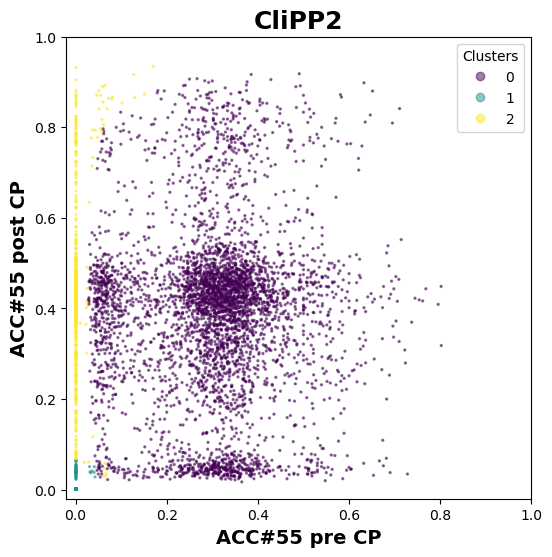

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# Create a scatter plot and save the returned PathCollection object in 'sc'
sc = plt.scatter(
    ccf_corrected[:, 1],
    ccf_corrected[:, 0],
    c=lab,            # coloring by the 'lab' array
    cmap='viridis',   # or another colormap
    s=2,
    alpha=0.5
)

# Axis limits
plt.xlim(-0.02, 1)
plt.ylim(-0.02, 1)

# Labels and title
plt.xlabel('ACC#55 pre CP', fontsize=14, fontweight='bold')
plt.ylabel('ACC#55 post CP', fontsize=14, fontweight='bold')
plt.title('CliPP2', fontsize=18, fontweight='bold')

# Remove the color bar (delete or comment out the colorbar line)
# plt.colorbar(label="Cluster Label")

# Create a legend for the scatter by extracting legend handles/labels
legend_handles, legend_labels = sc.legend_elements(prop="colors", alpha=0.5)
plt.legend(
    handles=legend_handles,
    labels=legend_labels,
    title="Clusters",
    loc="best"
)

plt.grid(False)
plt.show()
